<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
<small>
<br>November 9, 2017: refutation
<br>November 8, 2017: sets
<br>November 7, 2017: init
</small>
</div>
</p>

In [6]:
from IPython.display import Markdown, Image, Latex

from collections import defaultdict

from muk.core import *
from muk.ext import *
from mclock import *

from sympy import IndexedBase, symbols, latex, init_printing, Eq, Matrix, binomial
init_printing()


toc = ["", "exams & courses & conferences", "what I've done", "what I'm working on"]#, "thesis arguments"]
toc_iter = iter(toc[1:])

def reference_to_this_talk():
    src = '<a href="{href}">{href}</a>'
    return Markdown(src.format(href=r'http://massimo-nocentini.github.io/PhD/second-year-summary/talk.html'))

def table_of_contents():
    src = r'# TOC'
    return Markdown('\n- '.join(toc))

def greetings(smiley=True):
    return Markdown("<h1>{greet} {smile}</h1>".format(
        greet="Thanks for coming ", smile=":)" if smiley else ""))

def next_topic():
    return Markdown("# {topic}".format(topic=next(toc_iter)))

In [3]:
__AUTHOR__ = ("Massimo Nocentini", 
              "massimo.nocentini@unifi.it", 
              "https://github.com/massimo-nocentini/")

__ACKNOWLEDGEMENT__ = {"Beatrice Donati", "Marco Maggesi", }

__ABSTRACT__ = '''

    The relational language __microkanren__ is presented as a goal-based,
    Pythonic implementation with a *fair, complete* search strategy.

'''

__SELF__ = r'http://massimo-nocentini.github.io/PhD/mkpy/talk.html'

# raw outline

- programming *abstractions* and *paradigms*: *logic* to the rescue 
- *microkanren* relational language
- examples of *puzzles* and *combinatorics*

## it comes down to *sets*, eventually

- our main track concerns generation of __sets__, possibly *inductively* defined
- how programming languages allow us to do that?
- is it easy in every paradigm? 
    - what about imperative? functional? ...*relational*?
- by Church-Turing thesis, it should be possible even in *assembly* code
    - what if some kind of *elegance* is required?
    - don't you code not-so-easy to grasp implementation, do you?

# *primes* numbers

generate them using the [sieve of Eratosthenes][sieve]:

>iteratively mark as composite the multiples of each prime, starting with the first prime number, 2. The multiples of a given prime are generated as a sequence of numbers starting from that prime, with constant difference between them that is equal to that prime.

[sieve]:https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes

## imperative style

In [3]:
def filter_primes(primes):
    
    if not primes: return [] # base case for recursion
    
    prime, *nats = primes # get the next prime
    
    for i in range(len(nats)): # for every other number
        if nats[i] % prime == 0: # check if it is composite
            nats[i] = None # if yes, cancel it
            
    return [prime] + filter_primes([n for n in nats if n]) # recur

In [40]:
assert (filter_primes(range(2,52)) == 
        [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47])

## functional style

In [41]:
def filter_primes(primes):
    
    if not primes: return [] # base case for recursion
    
    prime, *nats = primes # get the next prime
    
    multiples = {number for number in nats 
                 if number % prime == 0} # enum multiples of prime
    
    return [prime] + filter_primes(sorted(set(nats) - multiples)) # recur

In [42]:
assert (filter_primes(range(2,52)) == 
        [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47])

## declarative style

```haskell
> primes = filte_prime [2..51] 
    where filter_prime (p:xs) = 
        p : filter_prime [x | x <- xs, x `mod` p /= 0] -- lazily
  
> primes == [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]
True
```

# *inductively-defined* sets

## a curious numbers machine

Let $▢, \triangle$ be natural numbers in machine 

$$
\mathcal{C} =  \left \lbrace{ \over 2▢ \stackrel{\circ}{\rightarrow} ▢} , {▢ \stackrel{\circ}{\rightarrow} \triangle \over 3▢ \stackrel{\circ}{\rightarrow} \triangle 2 \triangle} \right \rbrace
$$

Questions:
- enumerate $ \alpha \stackrel{\circ}{\rightarrow} \beta $, namely the set of numbers that the machine can produce
- does exist a number $\alpha$ such that $ \alpha \stackrel{\circ}{\rightarrow} \alpha $?
- does exist a number $\beta$ such that $ \beta \stackrel{\circ}{\rightarrow} \alpha\beta $, for every number $\alpha$?

*what paradigm do you feel comfortable with in order to answer that requests?*<br>
*are you able to generalize the algorithm to handle an arbitrary, inductively defined machine*?

---
this is part of a puzzle in the chapter *The mystery of the Montecarlo lock* <br>
of the book [*The Lady or the Tiger*][book] by logician Raymond Smullyan.

[book]:https://www.amazon.com/Lady-Tiger-Other-Puzzles-Recreational/dp/048647027X

## context-free grammars

let $\mathcal{D}$ be the set of [*Dyck paths*][dyck] and let $\leadsto$ be a *CFG* defined as follows

$$
\left\lbrace\begin{array}{l}
\leadsto = \varepsilon \\
\leadsto = \diagup \leadsto \diagdown \leadsto \\
\end{array}\right\rbrace
$$

Questions:
- enumerate $\mathcal{D}$ using $\leadsto$
- what values for α and β work for the following path to be in $\mathcal{D}$?


      α 
     / β 
    /   \
     
---
this CFG has a nice combinat interpretation, actually any other CFG would work

[dyck]:http://mathworld.wolfram.com/DyckPath.html

## recurrence relations

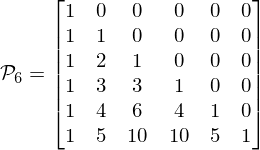

In [19]:
P = symbols(r'\mathcal{P}_{6}') # the *Pascal matrix*
Eq(P, Matrix(6, 6, binomial), evaluate=False)

$d_{nk}$ denotes the coefficient at row $n$ and column $k$ satisfying 

$$d_{n, k} = d_{n-1, k-1} + d_{n-1, k}$$

Questions:
- are you able to unfold the recurrence at different depths for the generic coeff? 
- can you generalize for an arbitrary recurrence?

# a bit of theory: *resolutions methods*

## by refutation

Let $\alpha$ be a *CNF* sentence and $M(\alpha)$ the set of models that satisfy it;<br>
a model is a set of assignments that make $\alpha$ true.

$\alpha$ is *valid* if it is true in *all* models;
oth, it is *satisfiable* if it is true in *some* model.

*Logical reasoning* boils down to *entailment* relation $\models$ between sentences

$$
    M(\alpha) \subseteq M(\beta) \leftrightarrow \alpha \models \beta \leftrightarrow 
    (\alpha \Rightarrow \beta) \text{ is valid } \leftrightarrow (\neg\alpha \vee \beta) \text{ is unsatisfiable}
$$

the *resolution rule* is a *complete* inference algorithm

$$
    {
    l_{0}\vee \ldots \vee l_{i} \vee \ldots \vee l_{j-1} \quad m_{0}\vee \ldots\vee m_{o}\vee\ldots\vee m_{k-1} \quad l_{i} = \neg m_{o}
    \over
    l_{0}\vee \ldots \vee l_{i-1}\vee l_{i+1} \vee \ldots\vee l_{j-1} \vee  
    m_{0}\vee \ldots \vee m_{o-1}\vee m_{o+1}\vee\ldots\vee m_{k-1}
    } 
$$

where $l_{q}, m_{w} \in\lbrace 0,1\rbrace$; finally, if two clauses resolve to yield the empty clause $\varepsilon$ then $\alpha\models\beta$ holds

algorithm [DPLL][dpll] is a recursive, depth-first enumeration of models using resolution<br>
paired with *early termination*, *pure symbol* and *unit clause* heuristics to speed up.

[dpll]:https://en.wikipedia.org/wiki/DPLL_algorithm

## by unification

it is a process of solving *equations between symbolic expressions*

a *solution* is denoted as a *substitution*, namely a mapping assigning<br> 
a symbolic value to each variable of the problem's expressions

*finite terms*: $\lbrace cons(x,cons(x,nil)) = cons(2,y)\rbrace \theta $ holds in subs $\theta = \lbrace x \mapsto 2, y \mapsto cons(2,nil) \rbrace$<br>
*infinite terms*: $ \lbrace y = cons(2,y) \rbrace \theta $ holds in subs $\theta = \lbrace y \mapsto cons(2,cons(2,cons(2,...))) \rbrace$ 

let $G$ be a set of equations, unification proceeds according to the following rules:
- *delete*: $G \cup \lbrace t = t \rbrace \rightarrow G$
- *decompose*: $G \cup \lbrace f(s_{0}, \ldots, s_{k}) = f(t_{0}, \ldots, t_{k})\rbrace \rightarrow G \cup \lbrace s_{0}=t_{0},\ldots, s_{k}=t_{k} \rbrace$
- *conflict*: if $f\neq g \vee k\neq m$ then $G \cup \lbrace f(s_{0}, \ldots, s_{k}) = g(t_{0}, \ldots, t_{m})\rbrace \rightarrow \,\perp$
- *eliminate*: 	if $x \not\in vars(t)$ and $x \in vars(G)$ then $G \cup \lbrace x = t\rbrace \rightarrow G\lbrace x \mapsto t\rbrace \cup \left\lbrace x \triangleq t\right\rbrace $
- *occur check*: if $x \in vars(f(s_{0},\ldots,s_{k}))$ then $G \cup \lbrace x = t(s_{0}, \ldots, s_{k}\rbrace \rightarrow \,\perp$

without *occur checks*, generating a substitution $\theta$ is a *recursive enumerable* problem

# microkanren

meet _microKanren_
- a DSL for relational programming, in Scheme
- purely functional of [_miniKanren_][mk]
- *explicit streams* of satisfying states, _goal-based_ approach
- _unification_ instead of _SLD-NF resolution_
- complete, _unfair_ search strategy

my contribution
- _Pythonic_ [implementation][mkpy]: functional at the core, objective at the interface
- generators subsume _countably_-satisfiable relations; complete, _fair_ [search][dovetail]
- _The Reasoned Schemer_ fully tested via [Travis CI][travis]; moreover, [read the docs][rtfd]
- case studies: Smullyan puzzles and combinatorics
- tweaking HOL Light for _certified deductions_, [wip][klight]

[mk]:http://minikanren.org/
[travis]:https://travis-ci.org/massimo-nocentini/microkanrenpy
[rtfd]:http://microkanrenpy.readthedocs.io/en/latest/
[klight]:https://github.com/massimo-nocentini/kanren-light
[mkpy]:https://github.com/massimo-nocentini/microkanrenpy
[dovetail]:http://microkanrenpy.readthedocs.io/en/latest/under_the_hood.html#muk.core.mplus

In [6]:
rvar(0) # a logic variable

▢₀

In [7]:
run(succeed) # a goal that always succeeds

[Tautology]

In [8]:
run(fail) # a goal that always fails

In [9]:
run(fresh(lambda q: succeed)) # a free variable without association

[▢₀]

In [10]:
run(unify(3, 3)) # unification of ground values

[Tautology]

In [11]:
run(fresh(lambda q: unify(3, q))) # unification of a variable

In [12]:
run(fresh(lambda q: unify([[2, 3], 1, 2, 3], [q, 1] + q))) # list unification

In [13]:
run(fresh(lambda q, z: unify(q, z) & unify(z, 3))) # co-sharing

In [14]:
run(fresh(lambda q: unify(q, False) | unify(q, True))) # disjunction

[False, True]

In [15]:
run(fresh(lambda q: 
          fresh(lambda q: unify(q, False)) & 
          unify(q, True))) # conjunction

[True]

In [16]:
def father(p, s):
    return conde([unify(p, 'paul'), unify(s, 'jason')],
                 [unify(p, 'john'), unify(s, 'henry')],
                 [unify(p, 'jason'), unify(s, 'tom')],
                 [unify(p, 'peter'), unify(s, 'brian')],
                 [unify(p, 'tom'), unify(s, 'peter')])

def grand_father(g, s):
    return fresh(lambda p: father(g, p) & father(p, s))

run(fresh(lambda rel, p, s: grand_father(p, s) & unify([p, s], rel)))

[['paul', 'tom'], ['jason', 'peter'], ['tom', 'brian']]

# a curious numbers machine

Recap, let $▢, \triangle$ be natural numbers in machine 

$$
\mathcal{C} =  \left \lbrace{ \over 2▢ \stackrel{\circ}{\rightarrow} ▢} , {▢ \stackrel{\circ}{\rightarrow} \triangle \over 3▢ \stackrel{\circ}{\rightarrow} \triangle 2 \triangle} \right \rbrace
$$


```python
def machine(*, rules): # an abstract machine
    def M(α, β):           
        return condi(*[[r(α, β, machine=M), succeed] for r in rules], dovetail=True)         
    return M 

def associateo(γ, γ2γ): # a number ctor
    return appendo(γ, [2]+γ, γ2γ)
    
def mcculloch_first_ruleo(α, β, *, machine): # McCulloch machine's first rule
    return unify([2]+β, α)

def mcculloch_second_ruleo(α, δ2δ, *, machine): # McCulloch machine's second rule
    return fresh(lambda η, δ: unify([3]+η, α) 
                            & associateo(δ, δ2δ) 
                            & machine(η, δ))
    
mccullocho = machine(rules=[ mcculloch_second_ruleo, mcculloch_first_ruleo, ])
```

## about the first rule 

In [11]:
run(mccullocho([2,3,4,5], [3,4,5])) # check

[Tautology]

In [10]:
run(fresh(lambda α, β: mccullocho([4]+β, α))) # attempt to break rules

In [12]:
run(fresh(lambda α: mccullocho([2,3,4,5], α))) # computing forwards

In [13]:
run(fresh(lambda α: mccullocho(α, [3,4,5]))) # computing backwards

## about the second rule



In [15]:
run(mccullocho([3,2,5], [5,2,5]))

[Tautology]

In [18]:
run(fresh(lambda α: mccullocho([3,3,2,5], α)), n=1)

In [19]:
run(fresh(lambda β: mccullocho(β, [5,2,5,2,5,2,5])))

## answers

In [24]:
run(fresh(lambda p, α, β: mccullocho(α, β) & unify([α, β], p)), n=10) # enumeration

[[[3, 2], [2]],
 [[2] + ▢₀, ▢₀],
 [[3, 3, 2], [2, 2, 2]],
 [[3, 2, ▢₀], [▢₀, 2, ▢₀]],
 [[3, 2, ▢₀, ▢₁], [▢₀, ▢₁, 2, ▢₀, ▢₁]],
 [[3, 3, 3, 2], [2, 2, 2, 2, 2, 2, 2]],
 [[3, 2, ▢₀, ▢₁, ▢₂], [▢₀, ▢₁, ▢₂, 2, ▢₀, ▢₁, ▢₂]],
 [[3, 3, 2, ▢₀], [▢₀, 2, ▢₀, 2, ▢₀, 2, ▢₀]],
 [[3, 2, ▢₀, ▢₁, ▢₂, ▢₃], [▢₀, ▢₁, ▢₂, ▢₃, 2, ▢₀, ▢₁, ▢₂, ▢₃]],
 [[3, 3, 2, ▢₀, ▢₁], [▢₀, ▢₁, 2, ▢₀, ▢₁, 2, ▢₀, ▢₁, 2, ▢₀, ▢₁]]]

In [25]:
run(fresh(lambda α: mccullocho(α, α)), n=1) # fixpoint

In [30]:
run(fresh(lambda out, γ, αγ: 
            mcculloch_lawo(γ, αγ) 
          & unify([γ, αγ], out)), n=5) # McCulloch's law

[[[3, 2, ▢₀, 3], [▢₀, 3, 2, ▢₀, 3]],
 [[3, 2, ▢₀, ▢₁, 3], [▢₀, ▢₁, 3, 2, ▢₀, ▢₁, 3]],
 [[3, 2, ▢₀, ▢₁, ▢₂, 3], [▢₀, ▢₁, ▢₂, 3, 2, ▢₀, ▢₁, ▢₂, 3]],
 [[3, 2, ▢₀, ▢₁, ▢₂, ▢₃, 3], [▢₀, ▢₁, ▢₂, ▢₃, 3, 2, ▢₀, ▢₁, ▢₂, ▢₃, 3]],
 [[3, 2, ▢₀, ▢₁, ▢₂, ▢₃, ▢₄, 3],
  [▢₀, ▢₁, ▢₂, ▢₃, ▢₄, 3, 2, ▢₀, ▢₁, ▢₂, ▢₃, ▢₄, 3]]]

# Dyck paths' CFG

In [26]:
def dycko(α):
    return conde([nullo(α), succeed],
                  else_clause=fresh(lambda β, γ:
                                    appendo(['(']+β, [')']+γ, α) @ 
                                            (dycko(β) @ dycko(γ))))

paths = run(fresh(lambda α: dycko(α)), n=80)
D = defaultdict(list)
for α in map(lambda α: ''.join(α), paths):
    D[len(α)//2].append(α)

In [27]:
from collections import namedtuple

dyck = namedtuple('dyck', ['paths', 'count'])

In [28]:
[dyck(paths, len(paths)) for i in range(5) for paths in [D[i]]]

[dyck(paths=[''], count=1),
 dyck(paths=['()'], count=1),
 dyck(paths=['()()', '(())'], count=2),
 dyck(paths=['()()()', '(())()', '()(())', '(()())', '((()))'], count=5),
 dyck(paths=['(())()()', '()()()()', '(())(())', '()(())()', '(()()())', '(()())()', '()()(())', '(()(()))', '((()))()', '()(()())', '((())())', '()((()))', '((()()))', '(((())))'], count=14)]

# Pascal triangle

In [29]:
P = IndexedBase('P')
n, m = symbols('n m')

def pascalo(depth, r, c, α):
    if not depth: return unify([P[r,c]], α)
    return fresh(lambda β, γ: (pascalo(depth-1, r-1, c-1, β) @
                               pascalo(depth-1, r-1, c, γ) @
                               appendo(β, γ, α)))

unfoldings = {d:sum(addends)
              for d in range(6) 
              for addends in run(fresh(lambda α: pascalo(d, n, m, α)))}

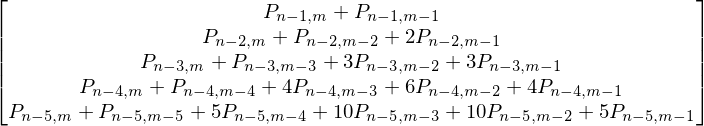

In [30]:
Matrix(5, 1, lambda i, j: unfoldings[i+1])

In [32]:
try: 
    next_topic()
except StopIteration: 
    import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [31]:
greetings(smiley=True)

<h1>Thanks for coming  :)</h1>

In [17]:
def fives(x):
    return unify(5, x) | fives(x)

try:
    run(fresh(lambda x: fives(x)))
except RecursionError:
    pass

In [18]:
def fives(x):
    return unify(5, x) | fresh(lambda y: fives(y))

run(fresh(fives), n=5)

[5, ▢₀, ▢₀, ▢₀, ▢₀]

In [19]:
g = fresh(lambda x: fives(x))
states = g(emptystate())
[next(states) for i in range(5)]

[state(sub={x₀: 5}, next_index=1),
 state(sub={y₁: 5}, next_index=2),
 state(sub={y₂: 5}, next_index=3),
 state(sub={y₃: 5}, next_index=4),
 state(sub={y₄: 5}, next_index=5)]

In [20]:
def fives(x):
    return unify(5, x) | fresh(lambda: fives(x))

run(fresh(fives), n=5)

In [21]:
g = fresh(lambda x: fives(x))
states = g(emptystate())
[next(states) for i in range(5)]

[state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1)]

In [22]:
def nats(x, n=0):
    return unify(n, x) | fresh(lambda: nats(x, n+1))

run(fresh(lambda x: nats(x)), n=10)

In [23]:
def nullo(l):
    return unify([], l)

def appendo(r, s, out):
    def A(r, out):
        return conde([nullo(r), unify(s, out)],
                     else_clause=fresh(lambda a, d, res:
                                           unify([a]+d, r) &
                                           unify([a]+res, out) &
                                           fresh(lambda: A(d, res))))
§    return A(r, out)

In [24]:
run(fresh(lambda l, q: appendo([1,2,3]+q, [4,5,6], l)), n=5)

[[1, 2, 3, 4, 5, 6],
 [1, 2, 3, ▢₀, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, ▢₂, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, ▢₂, ▢₃, 4, 5, 6]]

In [14]:
run(fresh(lambda r, x, y:
          appendo(x, y, ['cake', 'with', 'ice', 'd', 't']) &
          unify([x, y], r))) 

[[[], ['cake', 'with', 'ice', 'd', 't']],
 [['cake'], ['with', 'ice', 'd', 't']],
 [['cake', 'with'], ['ice', 'd', 't']],
 [['cake', 'with', 'ice'], ['d', 't']],
 [['cake', 'with', 'ice', 'd'], ['t']],
 [['cake', 'with', 'ice', 'd', 't'], []]]

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.